In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import Ridge
import seaborn as sns
sns.set()
import joblib
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform,randint
from tqdm import tqdm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import pickle
import sklearn.preprocessing as preproc 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [3]:
# Load the data into a pandas dataframe
df = pd.read_csv('ANN_df.csv')

In [4]:
# This code trains and tests the randomforestregressor on a set of 10,20 and 30 percent and evaluates the model with an RMSE score.
#RSME is the Root Mean square error, we want the RSME to be as low as possible as this predicts the GDP per Capita 


import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('ANN_df.csv')

# Split the data into features (X) and target variable (y)

X = df.drop(['GDP_per_capita_(constant_2015_US$)'], axis=1)  # Features
y = df['GDP_per_capita_(constant_2015_US$)']  # Target variable

# Set up the splits
splits = [0.1, 0.2, 0.3]  # 10%, 20%, and 30% splits
random_state = 23  # Set a random state for reproducibility

for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)

    # Create a random forest regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Fit the random forest regressor to the training data
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_regressor.predict(X_test)

    # Calculate the RMSE on the testing data
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Print the RMSE
    print(f"RMSE for {int(split*100)}% test set size: {rmse}")

RMSE for 10% test set size: 22795220489.592236
RMSE for 20% test set size: 21181264918.4433
RMSE for 30% test set size: 18859631362.00005


In [6]:
# This code trains and tests the randomforestregressor on a set of 10,20 and 30 percent and evaluates the model with an MSLE score.


import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import train_test_split


# Split the data into features (X) and target variable (y)
X = df.drop(['GDP_per_capita_(constant_2015_US$)'], axis=1)  # Features
y = df['GDP_per_capita_(constant_2015_US$)']  # Target variable

# Set up the splits
splits = [0.1, 0.2, 0.3]  # 10%, 20%, and 30% splits
random_state = 23  # Set a random state for reproducibility

for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)

    # Create a random forest regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Fit the random forest regressor to the training data
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_regressor.predict(X_test)

    # Calculate the MSLE on the testing data
    msle = mean_squared_log_error(y_test, y_pred)

    # Print the MSLE
    print(f"MSLE for {int(split*100)}% test set size: {msle}")

MSLE for 10% test set size: 4.405954748006455
MSLE for 20% test set size: 4.681325422367855
MSLE for 30% test set size: 3.8499651326852744


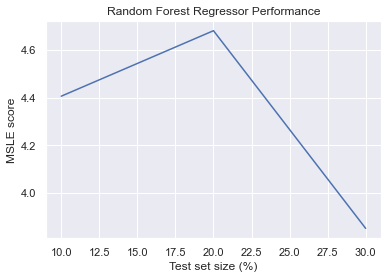

In [9]:
import matplotlib.pyplot as plt

# Initialize empty lists to store the results
test_set_sizes = []
msle_scores = []

for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)

    # Create a random forest regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Fit the random forest regressor to the training data
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_regressor.predict(X_test)

    # Calculate the MSLE on the testing data
    msle = mean_squared_log_error(y_test, y_pred)

    # Append the results to the lists
    test_set_sizes.append(int(split*100))
    msle_scores.append(msle)

# Create a line plot
plt.plot(test_set_sizes, msle_scores)
plt.xlabel("Test set size (%)")
plt.ylabel("MSLE score")
plt.title("Random Forest Regressor Performance")
plt.show()



In [7]:
##R-Squared Evaluation

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('ANN_df.csv')

# Split the data into features (X) and target variable (y)

X = df.drop(['GDP_per_capita_(constant_2015_US$)'], axis=1)  # Features
y = df['GDP_per_capita_(constant_2015_US$)']  # Target variable


# Create a random forest regressor
rf_regressor_pca = RandomForestRegressor(n_estimators=5, random_state=1)

# Set up the splits
splits = [0.1, 0.2, 0.3]  # 10%, 20%, and 30% splits
random_state = 23  # Set a random state for reproducibility

for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)

    # Create a random forest regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Fit the random forest regressor to the training data
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_regressor.predict(X_test)

    # Calculate the R-squared score on the testing data
    r2 = r2_score(y_test, y_pred)

    # Print the R-squared score
    print(f"R-squared score for {int(split*100)}% test set size: {r2:.2f}")

R-squared score for 10% test set size: 0.94
R-squared score for 20% test set size: 0.93
R-squared score for 30% test set size: 0.95


In [8]:
#Mean Absolute Error Evaluation

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('ANN_df.csv')

# Split the data into features (X) and target variable (y)

X = df.drop(['GDP_per_capita_(constant_2015_US$)'], axis=1)  # Features
y = df['GDP_per_capita_(constant_2015_US$)']  # Target variable

# Create a random forest regressor
rf_regressor_pca = RandomForestRegressor(n_estimators=5, random_state=1)

# Set up the splits
splits = [0.1, 0.2, 0.3]  # 10%, 20%, and 30% splits
random_state = 23  # Set a random state for reproducibility

for split in splits:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=random_state)

    # Create a random forest regressor
    rf_regressor = RandomForestRegressor(n_estimators=100, random_state=random_state)

    # Fit the random forest regressor to the training data
    rf_regressor.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = rf_regressor.predict(X_test)

    # Calculate the MAE on the testing data
    mae = mean_absolute_error(y_test, y_pred)

    # Print the MAE
    print(f"MAE for {int(split*100)}% test set size: {mae:.2f}")

MAE for 10% test set size: 4022385416.75
MAE for 20% test set size: 3113427428.63
MAE for 30% test set size: 2724523709.50
